# Création d'un modèle de classification en Python avec Scikit-learna

## Jeu de données
Les données sont liées à des campagnes de marketing direct d'une institution bancaire portugaise. Les campagnes de marketing étaient basées sur des appels téléphoniques. Souvent, plus d'un contact avec le même client était nécessaire, afin d'évaluer si le produit (dépôt bancaire à terme) serait ('oui') ou non ('non') souscrit.
    bank-full.csv est constitué de 45211 exemples et 17 entrées classées par date (de mai 2008 à novembre 2010)
#### Source : https://data.world/data-society/bank-marketing-data/workspace/file?filename=bank-full.csv

## But
    Le but de la classification est de prédire si le client souscrira (oui/non) un dépôt à terme (variable y).

## NB
    Télécharger au préalable le jeu de données et le placer dans le même dossier que le notebook jupyter créé

## Les Objectifs
+ Collecte et exploration des données
+ Préparation des données
+ Construction des modèles et évaluation
+ Amélioration et réglage d'hyper-paramètres

# 1. Collecter des données

* **`Pandas`** est une bibliothèque Python permettant la manipulation et l'analyse des données
* On utilise l'instruction **`import pandas`** pour charger la bibliothèque dans le notebook
* Comme alias, on utilise **`pd`**
* Instruction complète : **`import pandas as pd`**

In [1]:
import pandas as pd


### Les méthodes suivantes sont utilisées pour ouvrir un fichier :
+ `read_csv()` pour un fichier csv
+ `read_excel()` pour un fichier excel
+ `read_json()` pour un fichier json
+ etc

### Importer des données à partir d'un fichier CSV

In [2]:
bank_full = pd.read_csv("bank-full.csv", sep=';')
dataset = bank_full.copy()

Cette fonction **`pd.read_csv("bank-full.csv", sep=';')`** nous renvoie un type de données appelé **`Data Frame`**.
* Un Data Frame est un objet, c'est-à-dire une matrice
* Chaque colonne est de même type (nombre, dates, texte), 
* Elle peut contenir des valeurs manquantes. 
* On peut considérer chaque colonne comme les variables d'une table (pandas.

# 2. Exploration des données
**Phase de découverte et d'observation pour ainsi collecter de l'information sur les données en vue de prendre des décisions plus tard**
## 2.1 Description
Dans cette étape nous allons :
+ Consulter nos données
+ Identifier notre étiquette ou target
+ Décrire nos types de données 

### La méthode `head()` renvoie un aperçu des données stockées dans le dataframe
La méthode ne renvoie que les 5 premières lignes par défaut

In [3]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Variables d'entrée :
   #### Données clients bancaires :
+ **1 - age** (numérique)
+ **2 - job :** type d'emploi (catégorique : "admin.","inconnu","chômeur","gestion","femme de chambre","entrepreneur","étudiant", "col bleu","indépendant","retraité","technicien","services")
+ **3 - marital :** état civil (catégorique : "marié", "divorcé", "célibataire" ; note : "divorcé" signifie divorcé ou veuf)
+ **4 - education** (catégorique: "inconnu", "secondaire", "primaire", "tertiaire")
+ **5 - défaut :** a un crédit en défaut ? (binaire : "oui", "non")
+ **6 - balance :** solde annuel moyen, en euros (numérique)
+ **7 - housing :** a le prêt logement ? (binaire : "oui", "non")
+ **8 - loan :** a-t-il un prêt personnel ? (binaire : "oui", "non")
   #### Lié au dernier contact de la campagne en cours :
+ **9 - contact :** type de communication du contact (catégorique : "inconnu", "téléphone", "cellulaire")
+ **10 - day :** dernier jour de contact du mois (numérique)
+ **11 - month :** mois du dernier contact de l'année (catégorique : "jan", "feb", "mar", ..., "nov", "dec")
+ **12 - duration :** durée du dernier contact, en secondes (numérique)
   #### Autres attributs :
+ **13 - campaign :** nombre de contacts effectués au cours de cette campagne et pour ce client (numérique, inclut le dernier contact)
+ **14 - pdays :** nombre de jours écoulés après le dernier contact du client à partir d'une campagne précédente (numérique, -1 signifie que le client n'a pas été contacté auparavant)
+ **15 - previous :** nombre de contacts effectués avant cette campagne et pour ce client (numérique)
+ **16 - poutcome :** résultat de la campagne marketing précédente (catégorique : "inconnu", "autre", "échec", "succès")

  #### Variable de sortie (cible souhaitée) :
+ **17 - y -** le client a-t-il souscrit un terme

### La méthode `info()` renvoie un résumé concis des lignes et colones du dataframe

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


    Notre dataset contient 
* **`45211 lignes`** et **`17 colonnes`**, 
* **`7 des colonnes`** contiennent des valeurs entières 
* et les **`10`** autres contiennent des valeurs textuelles

### Valeurs manquantes
Le **`nan`** est une constante qui indique que la valeur donnée n’est pas légale - **`Not a Number`**.  

Pour identifier le nombre de valeurs NaN par colonne, nous pouvons utiliser : 
* la méthode **`isna()`** 
* puis ajouter la méthode **`sum()`** pour compter les valeurs NaN.

In [5]:
dataset.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
dataset.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

* La sortie est plutôt curieuse car elle n'identifie aucune valeur NaN  
* Les valeurs manquantes ont été remplacées par la valeur `unknown` dans ce dataset.  
* A ce moment nous pouvons décider de remplacer toutes les valeurs `unknown` par les valeurs manquantes `NaN` pour la suite.  
* La méthode utilisée est **`replace()`**.

**NumPy** est une bibliothèque pour Python  
elle est destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.  
Nous l'utilisons ici uniquement pour convertir la chaîne **unknown** en **NaN**.

In [7]:
import numpy as np
dataset=dataset.replace('unknown', np.NaN)

In [8]:
dataset.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
4,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [9]:
dataset.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [10]:
# renvoyer le dataset contenant toutes les valeurs nan de la colonne job
dataset[dataset['job'].isna()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
216,47,NaN,married,NaN,no,28,no,no,NaN,5,may,338,2,-1,0,NaN,no
354,59,NaN,divorced,NaN,no,27,no,no,NaN,5,may,347,3,-1,0,NaN,no
876,37,NaN,single,NaN,no,414,yes,no,NaN,7,may,131,1,-1,0,NaN,no
1072,29,NaN,single,primary,no,50,yes,no,NaN,7,may,50,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,45,NaN,married,tertiary,no,406,no,no,cellular,7,sep,314,1,-1,0,NaN,yes
44742,64,NaN,married,NaN,no,2799,no,no,telephone,9,sep,378,4,-1,0,NaN,no
44970,28,NaN,single,NaN,no,326,no,no,cellular,11,oct,450,1,231,1,success,yes
45141,77,NaN,married,NaN,no,397,no,no,telephone,8,nov,207,1,185,3,success,no


Nous allons représenter ces valeurs manquantes en des pourcentages  
Pour ce faire nous allons diviser `dataset.isna().sum()` par le nombre total de lignes `dataset.shape[0]`  
Ensuite trier le résultat par ordre croissant en ajoutant la méthode `sort_values()`

In [11]:
(dataset.isna().sum()/dataset.shape[0]).sort_values(ascending=True)

age          0.000000
previous     0.000000
pdays        0.000000
campaign     0.000000
duration     0.000000
month        0.000000
day          0.000000
y            0.000000
housing      0.000000
balance      0.000000
default      0.000000
marital      0.000000
loan         0.000000
job          0.006370
education    0.041074
contact      0.287983
poutcome     0.817478
dtype: float64

* La colonne `job` présente `288 de valeurs manquantes (soit 0,637%)`
* La colonne `education` en a `1857 (soit 4,1074%)`
* La colonne `contact` en a `13020 (soit 28,7983%)` et enfin
* La colonne `poutcome` en a `36959 (soit 81,7478%)`  
Nous verrons dans l'étape suivante comment traiter ces valeurs manquantes.

### Les agrégations simples
La méthode `describe()` renvoie un résumé statistique pour chacune des colonnes d'un DataFrame.  
Il est important de noter que les statistiques descriptives renvoyées par la méthode `describe()` dépendent du type de données d'une colonne.  
Pour les colonnes non numériques, les statistiques descriptives renvoyées par la méthode sont les suivantes:

|Name      |   Description  |
|-----------------|---------------------|
| `count`         | Nombre de valeurs non manquantes                       |
| `unique`       | Nombre de valeurs uniques non manquantes                   |
| `top`       | Valeur la plus courante   |
| `freq`        | Fréquence de la valeur la plus courante                   |

Par exemple, obtenons les statistiques descriptives de la colonne `job` non numérique dans le dataset. 


In [12]:
dataset[['job']].describe()

,job
count,44923
unique,11
top,blue-collar
freq,9732


* La sortie indique qu'il y a `44923 valeurs non manquantes` dans la colonne `job`  
* `11 professions uniques` dans les données.  
* Parmi les professions `blue-collar est la plus répandue avec 9732 occurrences

#### Pour les colonnes numériques, la méthode `describe()` renvoie les statistiques descriptives suivantes:

|Name      |   Description  |
|-----------------|---------------------|
| `count`         | Nombre de valeurs non manquantes                       |
| `mean`       | Moyenne des valeurs non manquantes                   |
| `std`       | Écart type des valeurs   |
| `min`        | Plus petite valeur                  |
| `25%`         | Le premier quartile                       |
| `50%`       | La médiane                   |
| `75%`       | Le troisième quartile   |
| `max`        | Plus grande valeur                   |

Pour illustrer le fonctionnement de la méthode **`describe()`** pour les colonnes numériques, obtenons des statistiques descriptives pour la colonne `age`. 

In [13]:
dataset[['age']].describe()

,age
count,45211.000000
mean,40.936210
std,10.618762
min,18.000000
25%,33.000000
50%,39.000000
75%,48.000000
max,95.000000


D'après les statistiques, nous pouvons dire que :  
* l'âge moyen des personnes est `40,936210`
* L'âge minimum est `18` et 
* Le maximum est `95`

Nous pouvons également calculer des agrégations spécifiques pour certaines colonnes.  
Par exemple, nous pouvons obtenir un décompte de chaque `job unique` dans les données avec la méthode **`value_counts()`**

In [14]:
dataset[['job']].value_counts()

job          
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
dtype: int64

Nous pouvons obtenir une distribution représentative en pourcentage pour chaque `job`  
Pour ce faire, nous modifions le code que nous avons exécuté dans la cellule précédente  
Dans la méthode **`value_counts()`**, nous spécifions une valeur pour **`normalize=True`**

In [15]:
dataset[['job']].value_counts(normalize=True)

job          
blue-collar      0.216637
management       0.210538
technician       0.169112
admin.           0.115108
services         0.092469
retired          0.050397
self-employed    0.035149
entrepreneur     0.033101
unemployed       0.029005
housemaid        0.027603
student          0.020880
dtype: float64

La sortie nous indique que :  
* `21,0538%` des clients contactés dans les données travaillent dans le `management` et  
* `3,3101%` sont des `entrepreneurs`.

Pour les colonnes numériques, nous pouvons également obtenir des agrégations spécifiques.  
Par exemple, nous pouvons calculer l'`âge moyen` de clients dans l'ensemble de données avec la méthode **`mean()`**. 

In [16]:
dataset[['age']].mean()

age    40.93621
dtype: float64

**Examinons à présent notre colonne target `y`**

In [17]:
dataset['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

* **Résultat** : **11,6985%** de **souscrits au dépot bancaire**.  
* **`Un important déséquilibre des classes`**

### Obtenir des agrégations au niveau du groupe

Nous pouvons également obtenir des agrégations spécifiques au niveau du groupe.  
Par exemple, on peut calculer le solde annuel moyen (`balance`), en euros par profession (`job`).

Pour ce faire, nous spécifions notre dataframe, appelons la méthode **`groupby()`** et lui passons la colonne sur laquelle nous voulons regrouper, qui est le nom du `job`  
Ensuite, nous spécifions la colonne par laquelle nous voulons agréger, qui est la `balance`  
Et enfin nous appelons la méthode **`mean()`**  
Ce résultat est trié par `job` pour nous aider à mieux comparer les soldes moyens des clients entre les `job`.

In [18]:
dataset.groupby('job')[['balance']].mean()

,balance
job,
admin.,1135.838909
blue-collar,1078.826654
entrepreneur,1521.470074
housemaid,1392.395161
management,1763.616832
retired,1984.215106
self-employed,1647.970868
services,997.088108
student,1388.060768


Trions les données par ordre croissant de solde annuel moyen  
Pour ce faire, nous apportons une légère modification à notre code  
Nous ajoutons une méthode de tri des valeurs (**`sort_values()`**) et disons trier par `balance`. 

In [19]:
dataset.groupby('job')[['balance']].mean().sort_values(by='balance')

,balance
job,
services,997.088108
blue-collar,1078.826654
admin.,1135.838909
technician,1252.632092
student,1388.060768
housemaid,1392.395161
entrepreneur,1521.470074
unemployed,1521.745971
self-employed,1647.970868


Maintenant, nous pouvons clairement voir qu'en moyenne, les clients ayant le `job services` ont le plus petit solde annuel  
Tandis que les `retraités` ont le plus grand solde annuel.

Nous pouvons également calculer plusieurs agrégations spécifiques à la fois  
Par exemple, calculons la `balance` médiane, minimale, maximale et moyenne des clients pour chaque catégorie de `job`  
Pour ce faire, une partie du code a déjà été écrite  
Ce que nous devons faire maintenant, c'est utiliser la méthode **`agg()`** et dans la méthode, nous spécifions les agrégations que nous voulons.

In [20]:
dataset.groupby('job')[['balance']].agg(['mean','median','min','max'])

balance                     
                      mean median   min     max
job                                            
admin.         1135.838909  396.0 -1601   64343
blue-collar    1078.826654  388.0 -8019   66653
entrepreneur   1521.470074  352.0 -2082   59649
housemaid      1392.395161  406.0 -1941   45141
management     1763.616832  572.0 -6847  102127
retired        1984.215106  787.0 -1598   81204
self-employed  1647.970868  526.0 -3313   52587
services        997.088108  339.5 -2122   57435
student        1388.060768  502.0  -679   24025
technician     1252.632092  421.0 -2827   45248
unemployed     1521.745971  529.0 -1270   44134

Pour explorer certaines des autres méthodes utiles pour décrire les données, visitez le site de documentation Pandas **`https://pandas.pydata.org/docs/`**

## 2.2 Visualisation

**Matplotlib** est une bibliothèque Python  
elle est destinée à tracer et visualiser des données sous formes de graphiques  
Elle peut être combinée avec les bibliothèques python de calcul scientifique NumPy et SciPy  
**Seaborn** est aussi une bibliothèque Python utilisée pour tracer des graphiques à l'aide de Matplotlib, Pandas et Numpy  
Il est construit sur le toit de Matplotlib et est considéré comme un sur-ensemble de la bibliothèque Matplotlib.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

### **Distribution des variables continues et discrètes**
Pour cette représentation de la distribution  
Nous allons d'abord repartir notre dataset en 2 (nombre de types de données qu'il y a dans le dataset) afin que chacun contienne un sous-ensemble contenant uniquement le même type de données  
La méthode **`select_dtypes()`** est utilisée à cet effet

In [22]:
dataset_int = dataset.select_dtypes('int') # dataset contenant uniquement des données numéique (continues)
dataset_object = dataset.select_dtypes('object') # dataset contenant uniquement des données textuelles (discrètes)

Nous allons créer une boucle **for** pour parcourir chacun des sous-ensembles du dataset afin de représenter la distribution des données de chacune des colonnes  
Nous allons utiliser pour cela la méthode **`distplot()`** du module **`seaborn`**

In [23]:
for col in dataset_int:
    plt.figure()
    sns.distplot(dataset_int[col])

Poue les variables qualitatives, nous pouvons d'abord chercher à savoir les différentes catégories qui existent pour chaque variable.  
La méthode **`unique()`** est utilisée à cet effet

In [24]:
for col in dataset_object:
    print(f'{col :-<30} {dataset[col].unique()}')

job--------------------------- ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital----------------------- ['married' 'single' 'divorced']
education--------------------- ['tertiary' 'secondary' nan 'primary']
default----------------------- ['no' 'yes']
housing----------------------- ['yes' 'no']
loan-------------------------- ['no' 'yes']
contact----------------------- [nan 'cellular' 'telephone']
month------------------------- ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome---------------------- [nan 'failure' 'other' 'success']
y----------------------------- ['no' 'yes']


Nos variables qualitatives ont en général plus de deux catégories

Nous pouvons ainsi représenter ces variables discrètes à travers un graphique camembert.  
Nous allons nous servir de la méthode **`plot.pie()`** de **pandas**

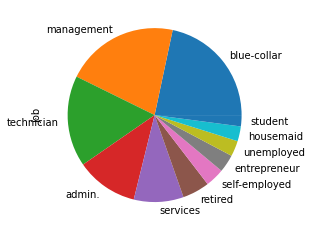

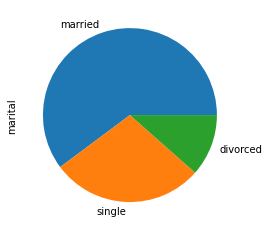

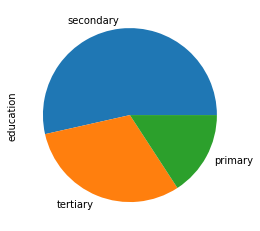

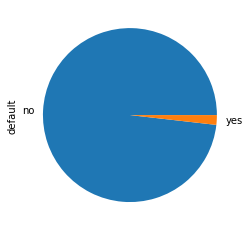

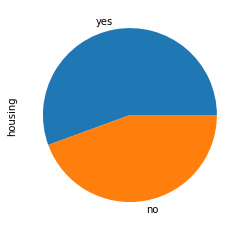

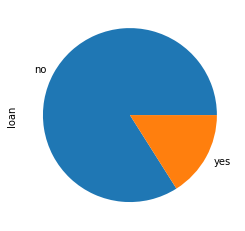

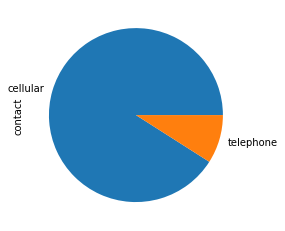

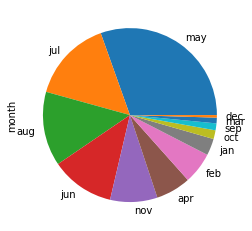

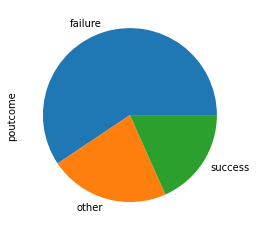

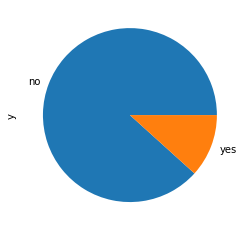

In [25]:
for col in dataset_object:
    plt.figure()
    dataset[col].value_counts().plot.pie()

### Visualisation de la relation entre les caractéristiques et l'étiquette
#### Création de sous-ensembles `yes` et `no` de l'étiquette

In [26]:
dataset_yes = dataset[dataset['y'] == 'yes']
dataset_no = dataset[dataset['y'] == 'no']

#### Relation Target / Variables continues

In [27]:
for col in dataset_int:
    plt.figure()
    sns.distplot(dataset_yes[col], label='yes')
    sns.distplot(dataset_no[col], label='no')
    plt.legend()

### Relation Target / Variables catégorielles
Pour décrire la relation entre deux variables catégorielles, nous utilisons un type spécial de tableau appelé **cross-tabulation** (tableau croisé) (ou **« croostab »** en abrégé).  
* Dans un tableau croisé, les catégories d'une variable déterminent les lignes du tableau et  
* les catégories de l'autre variable déterminent les colonnes.  
* Les cellules du tableau contiennent le nombre de fois qu'une combinaison particulière de catégories s'est produite.  
* Les "bords" (ou "marges") du tableau contiennent généralement le nombre total d'observations pour cette catégorie. 

Nous allons présenter les relations qui existent entre nos variables qualitatives et l'étiquette grâce à la méthode **`crosstab()`** du module **pandas**

In [28]:
pd.crosstab(dataset['y'], dataset['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
y,,,,,,,,,,,
no,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101
yes,631,708,123,109,1301,516,187,369,269,840,202


Pour avoir le tracé de la matrice retournée par la methode **crosstab()**, nous allons utilisé :  
**la méthode heatmap() de seaborn**  
Cette méthode permet le tracé de données rectangulaires sous la forme d'une matrice codée par couleur.  
Comme paramètre, il prend un jeu de données 2D.

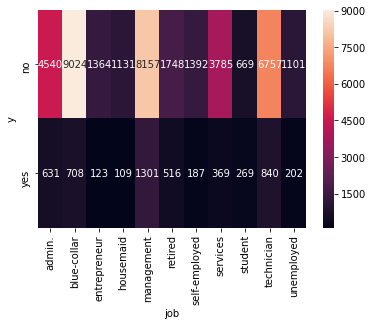

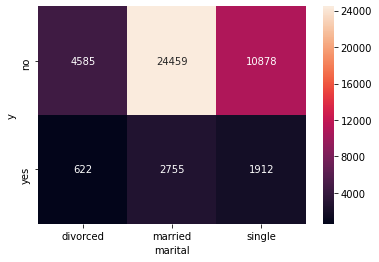

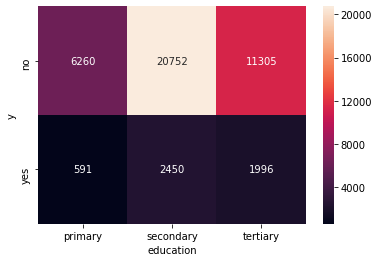

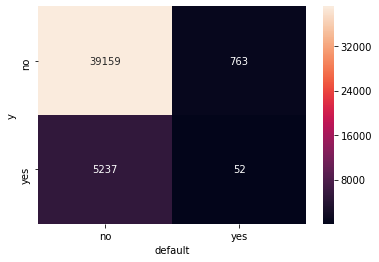

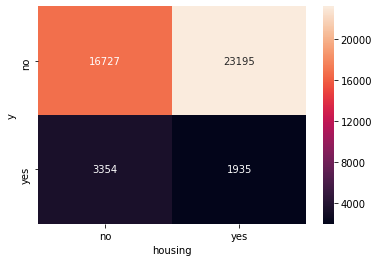

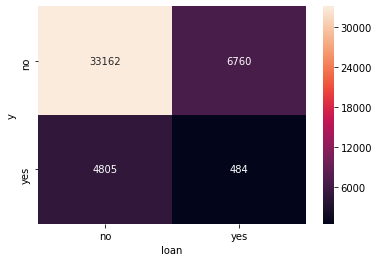

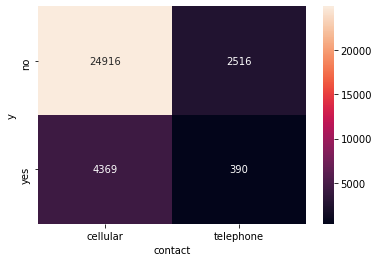

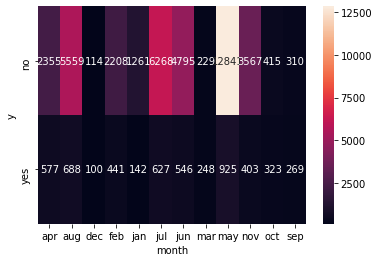

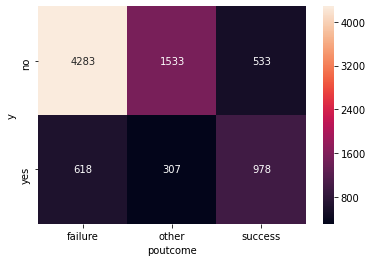

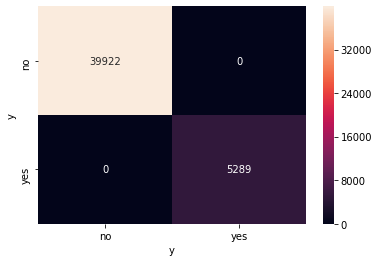

In [30]:
for col in dataset_object:
    plt.figure()
    sns.heatmap(pd.crosstab(dataset['y'], dataset[col]), annot=True, fmt='d')

### Relation entre deux variables
Nous allons visualiser les relations qui existent entre toutes les variables avec deux méthodes :
+ la méthode **`pairplot()`** de **seaborn**
+ la méthode **`heatmap()`** pour afficher la matrice de corrélation (**`corr()`**)

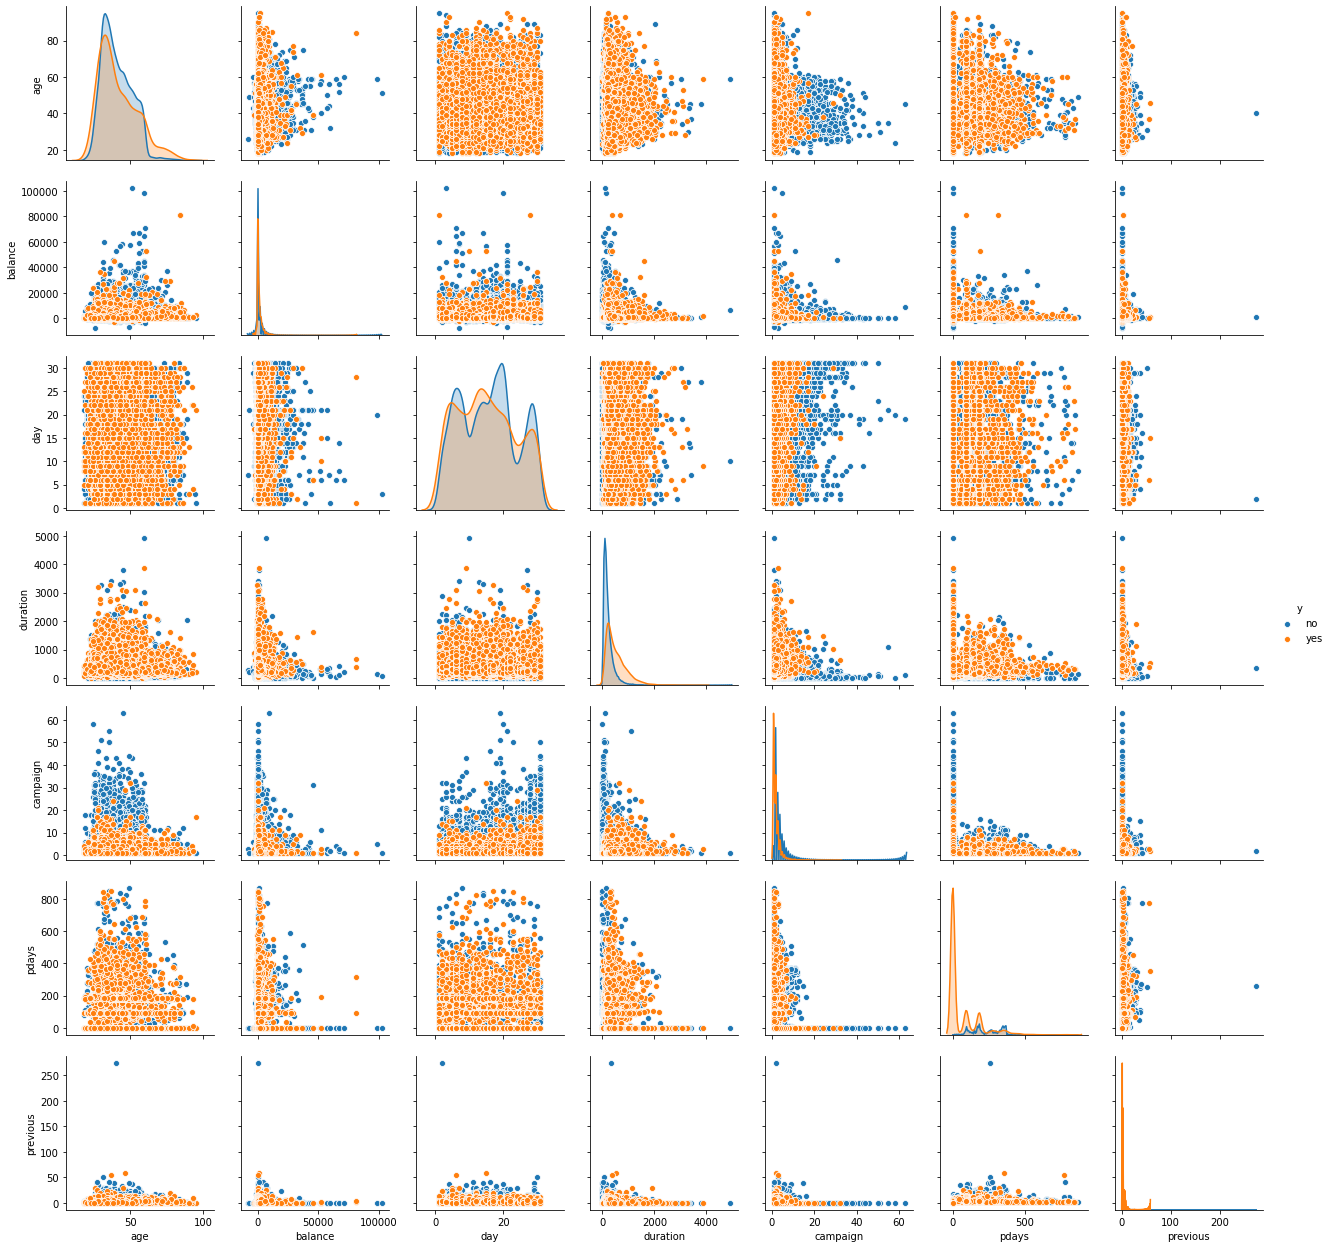

In [31]:
sns.pairplot(data=dataset, hue='y')

- Le graphique des paires nous permet de voir à la fois la distribution de variables uniques et les relations entre deux variables.  
- Le graphique des paires s'appuie sur deux figures de base, l'histogramme et le nuage de points.  
- L'histogramme sur la diagonale nous permet de voir la distribution d'une seule variable tandis que les diagrammes de dispersion sur les triangles supérieur et inférieur montrent la relation ou non entre deux variables.  
- Nous avons créé le graphique des paires en chargeant la bibliothèque **seaborn** et appelant la fonction **pairplot()**, en lui transmettant notre dataframe  
- Le tracé des paires par défaut dans **seaborn** trace uniquement les **`colonnes numériques`**  
- Nous utilisons la variable catégorielle **Target (y)** pour la coloration à travers le paramètre **hue**
- Le tracé des paires par défaut nous donne souvent des informations précieuses.  
- Par exemple il semble que la souscription d'un client pourrait dépendre de l'âge et de la durée du dernier appel.

In [32]:
dataset.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


#### Matrice de corrélation
La matrice de corrélation est utilisée pour évaluer la dépendence entre plusieurs variables en même temps. 

**Corrélation des données** : est un moyen de comprendre la relation entre plusieurs variables et attributs dans notre ensemble de données.  
À l'aide de la corrélation, nous pouvons obtenir des informations telles que :  
* Un ou plusieurs attributs dépendent d'un autre attribut ou d'une cause pour un autre attribut.  
* Un ou plusieurs attributs sont associés à d'autres attributs. 

**Interprétation** :
* Le coefficient de corrélation est compris entre -1 et 1.
* Plus le coefficient est proche de 1, plus la relation linéaire positive entre les variables est forte.
* Plus le coefficient est proche de -1, plus la relation linéaire négative entre les variables est forte.
* Plus le coefficient est proche de 0, plus la relation linéaire entre les variables est faible.  

**Utilité**  : 
* La corrélation peut aider à prédire un attribut à partir d'un autre (excellent moyen d'imputer les valeurs manquantes).
* La corrélation peut (parfois) indiquer la présence d'une relation causale.
* La corrélation est utilisée comme grandeur de base pour de nombreuses techniques de modélisation

<AxesSubplot:>

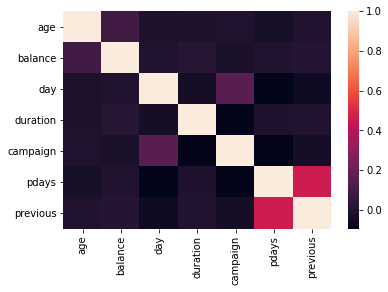

In [33]:
sns.heatmap(dataset.corr())

* Si l'ensemble de données a des attributs parfaitement positifs ou négatifs, il y a de fortes chances que les performances du modèle soient affectées par un problème appelé - **`"Multicolinéarité"`**.  

* On parle de multicolinéarité lorsqu’une des variables explicatives d’un modèle est une combinaison linéraire d’une ou plusieurs autres variables explicatives introduites dans le même modèle.  
* Une forte multicolinéarité entre plusieurs variables peut poser problème dans l’estimation et l’interprétation d’un modèle.  

* Heureusement, les algorithmes d'arbres de décision et d'arbres boostés sont immunisés contre la multicolinéarité par nature.  
* Lorsqu'ils décident de se diviser, l'arbre ne choisira qu'une seule des caractéristiques parfaitement corrélées.  * Cependant, d'autres algorithmes comme la régression logistique ou la régression linéaire ne sont pas à l'abri de ce problème et vous devez le résoudre avant de former le modèle.


**Résolution**
* Le moyen le plus simple consiste à supprimer ou à éliminer l'une des caractéristiques parfaitement corrélées.  
* Une autre méthode consiste à utiliser un algorithme de réduction de dimension tel que l'analyse en composantes principales (ACP) .

# 3. Préparer les données
**Phase de décision en vue de pré-traiter les données avant de les fournir au modèle pour son apprentissage**

**`Scikit-learn`** (**`Sklearn`**) est la bibliothèque la plus utile et la plus robuste pour l'apprentissage automatique en Python.  
Il fournit une sélection d'outils efficaces pour l'apprentissage automatique et la modélisation statistique, notamment la classification, la régression, le clustering et la réduction de la dimensionnalité via une interface de cohérence en Python.  

### Caractéristiques  

Plutôt que de se concentrer sur le chargement, la manipulation et la synthèse des données, la bibliothèque Scikit-learn se concentre sur la modélisation des données. Certains des groupes de modèles les plus populaires fournis par Sklearn sont les suivants :

**Algorithmes d'apprentissage supervisé** - Presque tous les algorithmes d'apprentissage supervisé populaires, tels que la régression linéaire, la machine à vecteurs de support (SVM), l'arbre de décision, etc., font partie de scikit-learn.

**Algorithmes d'apprentissage non supervisé** − D'un autre côté, il dispose également de tous les algorithmes d'apprentissage non supervisé populaires, du clustering, de l'analyse factorielle, de l'ACP (analyse en composantes principales) aux réseaux de neurones non supervisés.

**Clustering** - Ce modèle est utilisé pour regrouper des données non étiquetées.

**Validation croisée** - elle est utilisée pour vérifier l'exactitude des modèles supervisés sur des données invisibles.

**Réduction de la dimensionnalité** - Elle est utilisée pour réduire le nombre d'attributs dans les données qui peuvent être ensuite utilisés pour la synthèse, la visualisation et la sélection de caractéristiques.

**Méthodes d'ensemble** - Comme son nom l'indique, elle est utilisée pour combiner les prédictions de plusieurs modèles supervisés.

**Extraction de caractéristiques** - elle est utilisé pour extraire les caractéristiques des données pour définir les attributs dans les données d'image et de texte.

**Sélection de caractéristiques** - Il est utilisé pour identifier les attributs utiles pour créer des modèles supervisés.

**Open Source** - C'est une bibliothèque open source et également utilisable commercialement sous licence BSD.

### Diviser les données à l'aide d'un échantillonnage

Avant d'entraîner le modèle d'apprentissage automatique supervisé, nous devons généralement diviser l'ensemble de données en deux parties :  
* Un ensemble d'apprentissage et un ensemble de test. 
* Nous utilisons l'ensemble d'apprentissage pour entraîner le modèle et l'ensemble de test pour tester le modèle. * Après cela, nous pouvons évaluer la performance de notre modèle  

la fonction **`train_test_split()`** de **`scikit-learn`** pour diviser l'ensemble de données.  
Cette fonction a les arguments suivants :

**X, y** − Ici, X est la matrice de caractéristiques et y est le vecteur de réponse , qui doit être divisé.

**test_size** - Ceci représente le rapport des données de test au total des données données.

**random_size** - Il est utilisé pour garantir que la division sera toujours la même. Ceci est utile dans les situations où vous voulez des résultats reproductibles.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=0)

### Vérifions la repartition des données après l'échantillonnage

In [36]:
trainset['y'].value_counts()

no     31942
yes     4226
Name: y, dtype: int64

In [37]:
testset['y'].value_counts()

no     7980
yes    1063
Name: y, dtype: int64

## Encoder les données
Maintenant que nous avons exploré les variables de l'ensemble de données, nous pouvons passer à la préparation de l'ensemble de données pour la modélisation. Plus précisément, nous voulons transformer les données catégorielles de notre ensemble de données en données numériques. Ce processus est également connu sous le nom de d'**encodage de variables**.  

Pour pouvoir faire correspondre le bon encodeur à la bonne variable, nous devons faire la différence entre une variable nominale et une variable ordinale.  
La variable nominale est une variable catégorielle dont les données n'ont pas d'ordre logique.  
Exemples :  
* Mâle et femelle  
* Marié et célibataire etc...  

La variable ordinale, en revanche, est également une variable catégorielle mais ses données suivent un ordre logique. Voici quelques exemples de données ordinales:

* Petit, moyen et grand  
* Mauvais, neutre et bon  
* Enfants, adultes et seniors  
* Revenu faible, moyen et élevé  

Le module `Preprocessing` de `Scikit-learn` permet d'éffectuer des transformations d'encodage.  
L'objet `transformer` a pour rôle de transformer les données de façon cohérente, en appliquant sur les données du testset la même fonction de transformation qui a servie a traiter les données du trainset.  
Pour cela, les transformers disposent d'une méthode `fit(X_train)` et d'une méthode `transform(X_test)`  
Les opération d'encodage les plus populaires sont :  
`LabelEncoder, OrdinalEncoder, LabelBinarizer, et OneHotEncode`  
Les variables nominales sont encodées à l'aide de **`OneHotEncoder`** tandis que les variables ordinales sont encodées à l'aide d'**`OrdinalEncoder`**.  

**`OrdinalEncoder`** diffère de **`OneHotEncoder`** en ce qu'il attribue des valeurs incrémentielles aux catégories d'une variable ordinale.  
Cela aide les algorithmes d'apprentissage automatique à détecter une variable ordinale et à utiliser ensuite les informations qu'il a apprises pour faire des prédictions plus précises.  

Pour utiliser **`OrdinalEncoder`**, nous devons d'abord spécifier l'ordre dans lequel nous aimerions coder notre variable ordinale

*La seule **variable ordinale** dans notre ensemble de données est la caractéristique du **niveau d'éducation** des clients*.

### Encodage de l'étiquette
Nous allons commencer par importer le `Transformer`, créer un objet `LabelEncoder()` ensuite le développer grâce à la méthode `fit()`

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
l_encoder = LabelEncoder()
l_encoder.fit(dataset['y'])
l_encoder.classes_        # Afficher les classes de la colonne

array(['no', 'yes'], dtype=object)

On peut donc utiliser le `transformer` pour traiter les donner avec la méthode `transorm()`

In [40]:
l_encoder.transform(dataset['y'])

array([0, 0, 0, ..., 1, 0, 0])

In [41]:
dataset.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no


Aternativement il existe deux méthodes d'encodage issues de la bibliothèque `pandas`  
Les variables nominales sont encodées à l'aide de **`get_dummies()`** tandis que les variables ordinales sont encodées à l'aide de **`map()`**  
Ces méthodes Pandas ont une approche plus manuelle de l'encodage des variables nominales et ordinales.  
Bien qu'elles répliquent les résultats de `OneHotEncoder` et l'`OrdinalEncoder`, elles ne sont pas idéales pour encoder des variables nominales et ordinales avec un nombre élevé de valeurs uniques.

In [42]:
# Utilisation de la méthode get_dummies
pd.get_dummies(dataset['marital']).head()

,divorced,married,single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [43]:
dataset['education'].unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [44]:
# Utilisation de la méthode map()
dataset['education'].map({'primary': 0, 
                         'secondary': 1,
                         'tertiary': 2
                      }).head()

0    2.0
1    1.0
2    1.0
3    NaN
4    NaN
Name: education, dtype: float64

In [45]:
def encodage(dataset):
    dictionnaire_code = {'no':0,
            'yes':1,
            'married':1,
            'divorced':2,
            'single':0,
            'tertiary':3,
            'secondary':2,
            'primary':1,
            'jan':1,
            'feb':2,
            'mar':3,
            'apr':4,
            'may':5,
            'jun':6,
            'jul':7,
            'aug':8,
            'sep':9,
            'oct':10,
            'nov':11,
            'dec':12,
            'management':1,
            'technician':2,
            'entrepreneur':3,
            'blue-collar':4,
            'retired':5,
            'admin':6,
            'services':7,
            'self-employed':8,
            'unemployed':9,
            'housemaid':10,
            'student':11}
    
    for col in dataset.select_dtypes('object').columns:
        dataset.loc[:,col] = dataset[col].map(dictionnaire_code)
        
    return dataset

In [46]:
encodage(dataset)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1.0,1,3.0,0,2143,1,0,NaN,5,5,261,1,-1,0,NaN,0
1,44,2.0,0,2.0,0,29,1,0,NaN,5,5,151,1,-1,0,NaN,0
2,33,3.0,1,2.0,0,2,1,1,NaN,5,5,76,1,-1,0,NaN,0
3,47,4.0,1,NaN,0,1506,1,0,NaN,5,5,92,1,-1,0,NaN,0
4,33,NaN,0,NaN,0,1,0,0,NaN,5,5,198,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2.0,1,3.0,0,825,0,0,NaN,17,11,977,3,-1,0,NaN,1
45207,71,5.0,2,1.0,0,1729,0,0,NaN,17,11,456,2,-1,0,NaN,1
45208,72,5.0,1,2.0,0,5715,0,0,NaN,17,11,1127,5,184,3,NaN,1
45209,57,4.0,1,2.0,0,668,0,0,NaN,17,11,508,4,-1,0,NaN,0


## Gérer les données manquantes
Au cours de l'exploration, nous avons pu constater que certaines de nos données sont manquantes ou incomplètes.  
Des données manquantes pourraient résulter de changements dans les méthodes de collecte de données, d'erreurs humaines, de biais ou simplement du manque d'entrées fiables.  

Deux méthodes nous permettent de traiter nos valeurs manquantes :  
* **`dropna()`** pour supprimer les lignes et colonnes contenant des valeurs manquantes NaN
* **`fillna()`** pour remplacer les valeurs manquantes NaN par une valeur spécifique

Pour remplacer les valeurs manquantes dans une colonne par une valeur, nous procédons comme suit.  
Dans notre méthode fillna, nous spécifions un dictionnaire, la clé du dictionnaire sera la colonne que nous voulons et la valeur de la clé, du dictionnaire, est la valeur que nous voulons remplacer. 


In [47]:
# opérations de nettoyage des données
def imputation(dataset):
  #supprimer toutes les colonnes ayant au moins 20% de données manquantes
    print("Forme initiale : {}".format(dataset.shape))
    print("L'exécution de la fonction a commencé")
    dataset_1 = dataset.dropna(axis = 1, thresh = int(0.8*dataset.shape[0]))
    print("Suppression de la colonne initiale effectuée. Forme actuelle : {}".format(dataset_1.shape))
    
# # supprime toutes les lignes même avec une valeur NaN
#     dataset_1 = dataset_1.dropna()
#     print("Suppression de la ligne initiale effectuée. Forme acctuelle : {}".format(dataset_1.shape))
    
# rechercher toutes les colonnes remplies avec la même valeur et les supprimer
    colonnes_a_valeurs_uniques = dataset_1.columns[dataset_1.nunique() <= 1].tolist()
    dataset_1 = dataset_1.drop(colonnes_a_valeurs_uniques, axis=1)
    print("Suppression des colonnes remplies avec la même valeur. Forme retournée : {}".format(dataset_1.shape))
    for col in dataset_1:
        dataset_1 = dataset_1.fillna({col:dataset_1[col].median()})
    return dataset_1

In [48]:
type({'job':dataset['job'].median()})

dict

In [49]:
# Données nettoyéesa
dataset_impute = imputation(dataset)
print("Données nettoyées obtenues")

Forme initiale : (45211, 17)
L'exécution de la fonction a commencé
Suppression de la colonne initiale effectuée. Forme actuelle : (45211, 15)
Suppression des colonnes remplies avec la même valeur. Forme retournée : (45211, 15)
Données nettoyées obtenues


In [50]:
dataset_impute

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,1.0,1,3.0,0,2143,1,0,5,5,261,1,-1,0,0
1,44,2.0,0,2.0,0,29,1,0,5,5,151,1,-1,0,0
2,33,3.0,1,2.0,0,2,1,1,5,5,76,1,-1,0,0
3,47,4.0,1,2.0,0,1506,1,0,5,5,92,1,-1,0,0
4,33,4.0,0,2.0,0,1,0,0,5,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2.0,1,3.0,0,825,0,0,17,11,977,3,-1,0,1
45207,71,5.0,2,1.0,0,1729,0,0,17,11,456,2,-1,0,1
45208,72,5.0,1,2.0,0,5715,0,0,17,11,1127,5,184,3,1
45209,57,4.0,1,2.0,0,668,0,0,17,11,508,4,-1,0,0


Le module `Impute` de Sklearn (scikit-learn) permet aussi de nettoyer le dataset des valeurs manquantes qui le composent. Pour cela, différents `transformers` sont disponibles :

- SimpleImputer : qui remplace toute valeur manquante par une statistique ou une constante donnée
- KNNImputer : qui remplace les valeurs manquantes d'un échantillon par les valeurs de ses plus proches voisin

In [51]:
# Pipeline de prétraitement des données
def preprocessing(dataset):
    
    dataset = encodage(dataset)
    dataset = imputation(dataset)
    
    X = dataset.drop('y', axis=1)
    y = dataset['y']
    print('\n')
    print(y.value_counts())
    
    return X, y

In [52]:
X_train, y_train = preprocessing(trainset)

Forme initiale : (36168, 17)
L'exécution de la fonction a commencé
Suppression de la colonne initiale effectuée. Forme actuelle : (36168, 15)
Suppression des colonnes remplies avec la même valeur. Forme retournée : (36168, 15)


0    31942
1     4226
Name: y, dtype: int64


C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [53]:
X_test, y_test = preprocessing(testset)

Forme initiale : (9043, 17)
L'exécution de la fonction a commencé
Suppression de la colonne initiale effectuée. Forme actuelle : (9043, 15)
Suppression des colonnes remplies avec la même valeur. Forme retournée : (9043, 15)


0    7980
1    1063
Name: y, dtype: int64


C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


# 4. Former le modèle

Nous pouvons utiliser notre ensemble de données pour entraîner un modèle de prédiction.  
Comme indiqué, **scikit-learn** propose une large gamme d' algorithmes d'apprentissage automatique (ML) qui ont une interface cohérente pour l'ajustement, la précision de la prédiction, le rappel, etc.  

Nous allons utiliser les classificateurs :  
### KNN (K voisins les plus proches) 
k-NN (k-Nearest Neighbor), l'un des algorithmes d'apprentissage automatique les plus simples, est de nature non paramétrique et paresseuse. Non paramétrique signifie qu'il n'y a aucune hypothèse pour la distribution des données sous-jacentes, c'est-à-dire que la structure du modèle est déterminée à partir de l'ensemble de données.  
**sklearn.neighbors** est le module utilisé pour implémenter l'apprentissage du plus proche voisin.

### Machines à vecteurs de support  
Les SVM sont très efficaces dans les espaces de grande dimension et sont généralement utilisés dans les problèmes de classification.
Les SVM sont populaires et économes en mémoire car elles utilisent un sous-ensemble de points d'apprentissage dans la fonction de décision.

L'objectif principal des SVM est de diviser les ensembles de données en nombre de classes afin de trouver un hyperplan marginal maximum (MMH) qui peut être fait dans les deux étapes suivantes -

Les machines à vecteurs de support vont d'abord générer des hyperplans de manière itérative qui sépare les classes de la meilleure façon.

Après cela, il choisira l'hyperplan qui sépare correctement les classes.

Certains concepts importants dans SVM sont les suivants :

**Vecteurs de support** - Ils peuvent être définis comme les points de données les plus proches de l'hyperplan. Les vecteurs de support aident à déterminer la ligne de séparation.

**Hyperplan** - Le plan ou l'espace de décision qui divise un ensemble d'objets ayant différentes classes.

**Marge** - L'espace entre deux lignes sur les points de données de placard de différentes classes est appelé marge.
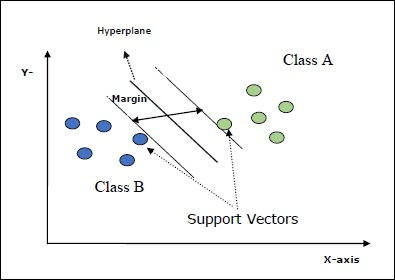  

**Scikit-learn** fournit trois classes, à savoir **SVC, NuSVC et LinearSVC**, qui peuvent effectuer une classification multiclasse.




### Arbres de décisions  
L'objectif principal des DT est de créer un modèle prédisant la valeur de la variable cible en apprenant des règles de décision simples déduites des caractéristiques des données.  
La bibliothèque Scikit-learn fournit le nom de module **DecisionTreeClassifier** pour effectuer une classification multiclasse sur un ensemble de données.  


### Forêt aléatoire
Comme nous savons qu'un arbre de décision est généralement formé en divisant récursivement les données, mais étant sujet au surajustement, ils ont été transformés en forêts aléatoires en entraînant de nombreux arbres sur divers sous-échantillons de données.  
Pour créer un classificateur de forêt aléatoire, le module Scikit-learn fournit **sklearn.ensemble.RandomForestClassifier**.  
Lors de la construction du classificateur de forêt aléatoire, les principaux paramètres utilisés par ce module sont **'max_features' et 'n_estimators'** .

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
model_Decision = DecisionTreeClassifier(random_state=0)
model_KNN = KNeighborsClassifier()
model_SVC = SVC(gamma='auto', random_state=0)
model_RF = RandomForestClassifier(random_state=0)

In [56]:
# Formation des modèles
models = [model_Decision, model_KNN, model_SVC, model_RF]
print("---Formation des modèles---\n-------------------\n")
for model in models:
    print(model)
    model.fit(X_train, y_train)
    print("\n")

---Formation des modèles---
-------------------

DecisionTreeClassifier(random_state=0)


KNeighborsClassifier()


SVC(gamma='auto', random_state=0)


RandomForestClassifier(random_state=0)




# 5. Évaluer le modèle

In [63]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [64]:
def matrice_de_confusion(matrix):
    group_names = ['Vrai Neg','Faux Pos','Faux Neg','Vrai Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         matrix.flatten()/np.sum(matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    plt.figure()
    sns.heatmap(matrix, annot=labels, fmt='', cmap='Oranges')
    plt.title("Matrice de confusion\n")
    plt.xlabel("Valeurs prédites\n")
    plt.ylabel("Valeurs réelles\n")
    # plt.xticks([0, 1], ['no', 'yes'])
    # plt.yticks([0, 1], ['no', 'yes'])
    plt.show()

In [65]:
def evaluation():
    models = [model_Decision, model_KNN, model_SVC, model_RF]
    print("---Évaluation des modèles des modèles---\n-------------------\n")
    for model in models:
        print(model)
        ypred = model.predict(X_test)
        print("\n****La précision de classification est : ", model.score(X_test, y_test), "****")
        matrix = confusion_matrix(y_test, ypred)
        matrice_de_confusion(matrix)
        print(classification_report(y_test, ypred))
        print("\n")

In [66]:
print(model_Decision.score(X_test, y_test))

0.8685170850381511


In [67]:
# labels = ['Vrai Neg','Faux Pos','Faux Neg','Vrai Pos'] 
# labels = np.asarray(labels).reshape(2,2)
# plt.figure()
# sns.heatmap(matrix, annot=labels, fmt= '', cmap='Oranges')
# plt.figure()
# sns.heatmap(matrix, annot=True,  fmt= '', cmap='Oranges')
# plt.show()

---Évaluation des modèles des modèles---
-------------------

DecisionTreeClassifier(random_state=0)

****La précision de classification est :  0.8685170850381511 ****


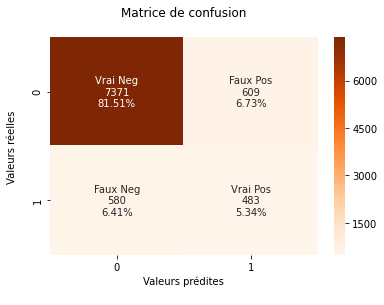

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7980
           1       0.44      0.45      0.45      1063

    accuracy                           0.87      9043
   macro avg       0.68      0.69      0.69      9043
weighted avg       0.87      0.87      0.87      9043



KNeighborsClassifier()

****La précision de classification est :  0.877031958420878 ****


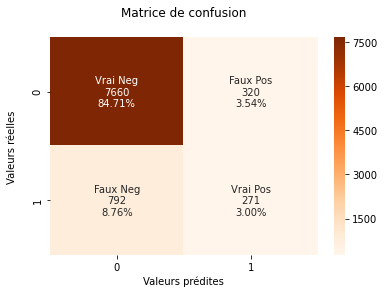

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7980
           1       0.46      0.25      0.33      1063

    accuracy                           0.88      9043
   macro avg       0.68      0.61      0.63      9043
weighted avg       0.85      0.88      0.86      9043



SVC(gamma='auto', random_state=0)


In [ ]:
evaluation()

Si nous évaluons nos modèles à l'aide d'une métrique, le modèle pourrait offrir des résultats satisfaisants.  
Mais, si nous évaluons par rapport à d'autres indicateurs nous risquons d'obtenir de mauvais résultats.  
Le plus souvent, nous utilisons la précision de la classification pour calculer l'efficacité de notre modèle, mais elle n'est pas suffisante pour vraiment évaluer un modèle.  
Nous allons donc faire appel à d'autres formes de métriques de performances de classification.

* **1- Précision de la classification**  
    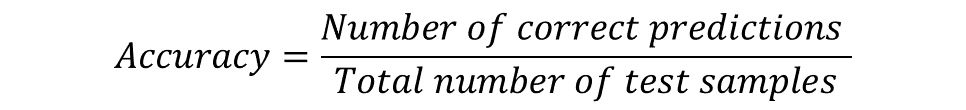
    La précision de la classification est excellente, mais nous donne la fausse impression d'atteindre une  précision élevée.  
    Le vrai problème se pose lorsque le coût d'une mauvaise classification des échantillons de la classe mineure est très élevé.  
    Par exemple : Si nous traitons une maladie rare mais mortelle, le coût de ne pas diagnostiquer la maladie d'une personne malade est beaucoup plus élevé que le coût d'envoyer une personne en bonne santé à plus de tests.  
    
    
* **2- Matrice de confusion** :  
    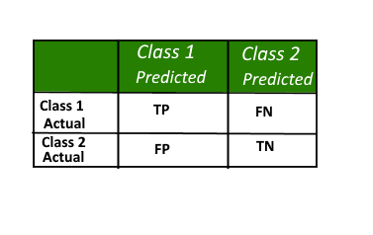
    Un tableau utilisé pour décrire les performances d'un modèle de classification sur une donnée de test.  
    Elle Permet d'identifier facilement les confusions entre les classes 
    
    
* **3- Précision et rappel (sensibilité)** :
    La précision décrit efficacement la pureté de nos détections positives par rapport à la vérité terrain.   
    La précision correspond au nombre total d'exemples positifs correctement classés divisé par le nombre total d'exemples positifs prédits  
    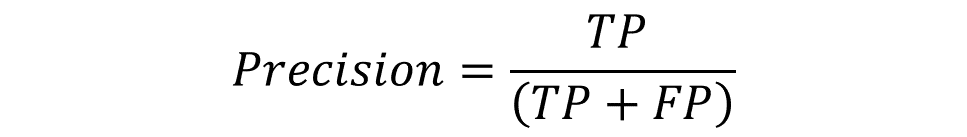
    Le rappel décrit l'exhaustivité de nos prédictions positives par rapport à la vérité de terrain.   
    Le rappel correspond au nombre total d'exemples positifs correctement classés divisé par le nombre total d'exemples positifs
    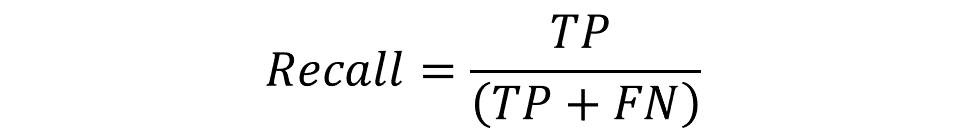
    
    Rappel élevé, système souhaité de haute précision  
    Rappel élevé, faible précision Cela signifie que la plupart des exemples positifs sont correctement reconnus (faible FN) mais il y a beaucoup de faux positifs.  
    Rappel faible, précision élevée Cela montre que nous manquons beaucoup d'exemples positifs (FN élevé) mais ceux que nous prédisons comme positifs sont en effet positifs (FP faible)  
    
    Pour une classification binaire, le rappel de la classe positive est également appelé « sensibilité »  
    Le rappel de la classe négative est la « spécificité » autrement dit la capacité à détecter toutes les
    situations où il n’y a pas de pannes.  
    

* **4- Mesure F**  
    Une mesure qui combine précision et rappel  
    Moyenne harmonique de précision et de rappel  
    Sera toujours plus proche de la plus petite valeur de Précision ou de Rappel  
    Atteint sa meilleure valeur à 1 et la pire à 0
    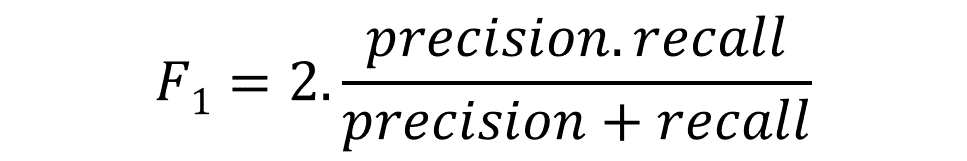

## Visualisation du modèle
### Arbre de décision

Les arbres de décision peuvent être tracés facilement avec matplotlib en utilisant la méthode **plot_tree()** du module **tree** de **scikit-learn**  
Le code ci-dessous trace un arbre de décision à l'aide de scikit-learn.

In [ ]:
from sklearn import tree
la_figure1 = plt.figure(figsize=( 16 , 8 ))
tree.plot_tree(model_Decision, max_depth = 3, filled= True, 
               feature_names= X_test.columns, node_ids=True,
               class_names = ['no', 'yes'], fontsize= 8 )
plt.show()

## Pour enregistrer la figure dans fichier

In [ ]:
la_figure1.savefig("decistion_tree.png")

### Forêt aléatoire
- Random Forest est une méthode d'ensemble.  
- Cela signifie qu'elle utilise plusieurs arbres de décisions individuels pour obtenir une meilleure performance prédictive que celle qui pourrait être obtenue à partir d'un seul arbre de décision.  
- Après avoir formé notre modèle Random Forest, il serait bon de regarder les arbres de décision individuels qui le composent.

In [ ]:
model_RF.estimators_

In [ ]:
# Nombre d'arbres de décision individuels dans notre Forêt améatoire
print("Le nombre d'arbres de décision individuels dans le modèle Forêt améatoire est", len(model_RF.estimators_))

### Nous pouvons ainsi visualiser des arbres individuels de notre forêt aléatoire
Il suffit de changer la valeur de l'index de **model_RF.estimators_[index]** pour visualiser l'arbre
Cas **index = 50**  
On pourrait utiliser une boucle également pour renvoyer plusieurs arbres à la fois

In [ ]:
from sklearn import tree
la_figure2 = plt.figure(figsize=( 16 , 8 ))
tree.plot_tree(model_RF.estimators_[50], max_depth = 3, filled= True, 
               feature_names= X_test.columns, node_ids=True,
               class_names = ['no', 'yes'], fontsize= 8 )
plt.show()

### Quelques concepts clés à retenir sont
+ **Question posée sur les données basées sur une caractéristique** : cela détermine la façon dont nous parcourons l'arbre pour un nouveau point de données.
+ **gini** : l'impureté Gini du nœud. L'impureté gini moyenne (pondérée par les échantillons) diminue à chaque niveau de l'arbre.
+ **samples (échantillons)** : nombre d'observations d'apprentissage dans le nœud
+ **value (valeur)** : [nombre d'échantillons dans la première classe, nombre d'échantillons dans la deuxième classe]
+ **class (classe)** : la classe prédite pour tous les points du nœud si l'arbre se termine à cette profondeur (valeur par défaut à 0 pour une égalité).  

Théoriquement Somme des valeurs d'un nœud = Échantillons  

Les nœuds feuilles (les nœuds terminaux à chaque branche) n'ont pas de question car ils sont là où l'arbre fait une prédiction. Tous les échantillons d'un nœud feuille sont affectés à la même classe.

**REMARQUE** : comme indiqué ci-dessus, pour la 2ème figure, Somme des valeurs à un nœud > Échantillons,  
Cela est dû au fait que la forêt aléatoire fonctionne avec des doublons générés à l'aide d'un échantillonnage bootstrap.  
**Bootstrapping** : échantillonnage d'ensembles aléatoires d'observations avec remise. Méthode utilisée par la forêt aléatoire pour entraîner chaque arbre de décision.  
À chaque nœud, 63,2 % des valeurs sont des valeurs réelles et les autres sont des doublons générés.  
(Juste pour vérifier par recoupement, calculez 63,2 % de la somme des valeurs à n'importe quel nœud, cela équivaut à peu près au nombre d'échantillons)

###  Vecteurs de support
Il existe trois attributs importants attachés au classificateur **model_SVC** formé.

+ L'attribut **support_**, qui contient les numéros d'index des échantillons de notre ensemble d'apprentissage qui se sont avérés être les vecteurs de support.
+ L'attribut **n_support_**, qui fournit le nombre de vecteurs de support pour chaque classe.
+ L'attribut **support_vectors_**, qui fournit les vecteurs de support eux-mêmes - de sorte que nous n'avons pas + besoin d'effectuer une recherche de tableau après avoir utilisé support_ .

In [ ]:
# Obtenir le nombre et les indices de vecteur de support
print(model_SVC.support_)
print(len(model_SVC.support_))

In [ ]:
# Obtenir le nombre de vecteurs de support par classe
print(model_SVC.n_support_)

- Nous pouvons visualiser les vecteurs de support et l'ensemble d'apprentissage en utilisant la méthode **scatter()** de Matplotlib qui représente un nuage de points de y par rapport à x avec une taille et/ou une couleur de marqueur variable.  
- x et y doivent être des caractériques, les colonnes de notre **X_train** et nous allons utiliser **y_train** pour les couleurs de marqueurs **yes ou no**  
- Le premier **plt.scatter** est utilisé pour visualiser l'ensemble d'entrainement et   
- le second pour visualiser uniquement les vecteurs de support  

In [ ]:
# Obtenir les vecteurs de support
support_vectors = model_SVC.support_vectors_

# Visualiser les vecteurs de support
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,5], c=y_train)
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Données linéairement séparables avec vecteurs de support')
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[5])
plt.show()

## Amélioration du modèle (Trouver les meilleurs hyper-paramètres)
Une recherche par grille nous permettra d'essayer toutes les combinaisons possibles des valeurs de d'hyper-paramètres que nous fournissons. 
La méthode GridSearchCV() effectue une triple validation croisée sur chaque combinaison et renvoie celle qui a obtenu les meilleurs résultats en moyenne.  

**Exemple** : Vérifions les quelques valeurs d'hyper-paramètres utilisées par défaut pour le modèle Random forest

In [ ]:
# importation du module
from sklearn.model_selection import GridSearchCV

In [ ]:
# Les caractéristiques importantes d'après le modèle basé sur Random Forest
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

On utilise la méthode **`get_params()`** pour obtenir les paramètres d'un estimateur (modèle)

In [ ]:
model_RF.get_params()

Pour les valeurs de paramètre, nous pouvons essayer :  
**100** contre **200** arbres de décision (n_estimators); 
une sélection de **5, 7 ou les 10** caractéristiques (max_features) et  
une profondeur d'arborescence de **20 contre 25**.

In [ ]:
# Utilisez GridSearchCV pour trouver les meilleurs paramètres pour la forêt aléatoire

# définition de la plage des hyper-paramètres
params = {'n_estimators': [100, 200],
          'max_features': [5, 7, 10],
          'max_depth': [20, 25]}
grid_RF = GridSearchCV(model_RF, params, cv=3, n_jobs=-1)

# ajustement du modèle pour la recherche de grille
grid_RF.fit(X_train, y_train)

In [ ]:
# Afficher le meilleur score et les paramètres
print('Meilleur score:', grid_RF.best_score_)
print('Meilleurs hyper-paramètres:', grid_RF.best_params_)

La meilleure option trouvée dans ce cas par la recherche par grille avait un score de précision de **90,0%** avec les paramètres énumérés ci-dessus.

Examinons maintenant les performances du meilleur modèle de forêt aléatoire lors de la prédiction sur les ensembles de données d'entraînement et de test.

In [ ]:
# Afficher les métriques du meilleur modèle pour les données d'entrainement
y_pred = grid_RF.predict(X_train)
print(model.score(X_train, y_train))
print(classification_report(y_train, y_pred))
matrix = confusion_matrix(y_train, y_pred)
matrice_de_confusion(matrix)

In [ ]:
# Afficher les métriques de validation pour le meilleur modèle
y_pred = grid_RF.predict(X_test)
print(model.score(X_test, y_test))
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
matrice_de_confusion(matrix)

Le modèle a été relativement améliorer par rapport au score F1 du modèle avec les paramètres par défaut.
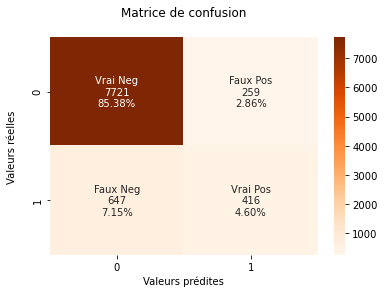  

Bien évidemment il ne s'agit pas du meilleur modèle de tous les temps mais de la plage d'hyper-paramètres definie pendant la recherche par grille.  
Nous pouvons donc augmenter cette plage d'hyper-paramètres et reprendre cette étape le maximum de fois afin d'obtenir un modèle encore meilleur selon nos exigences de performance.  

Pour aller loin, le modèle peut-être aussi améliorer en revenant sur l'étape de préparation des données en y apportant :  
- la normalisation des données
- la selection des caractérisqtiques
- l'ingéniérie des caractéristiques
- la réduction de la dimentionnalité telle que l'Analyse en composantes principales (ACP)
- Le rééchantillonage pour résoudre le problème de déséquilibre des classes

## Enregistrer le modèle

Une dernière étape pour nous faire gagner du temps à l'avenir consiste à enregistrer une copie du modèle qui est déjà formée et prête à être utilisée pour la prédiction.  
A cet effet on utilise JobLib pour sérialiser et enregistrer les modèles.

In [ ]:
import joblib

# enregistrer le modèle sur le disque
joblib.dump(model_RF, 'Modele_RF')

Pour désérialiser et charger les modèles

In [ ]:
model_charge = joblib.load('Modele_RF')
model_charge.score(X_test, y_test)